___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 1 `( Data Cleaning )`

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [185]:
import json
import re

In [111]:
df=pd.read_json('scout_car.json', lines=True )


In [112]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [114]:
df.columns = df.columns.str.strip().str.lower() # column isimlerini hepsi tek düze olacak şekilde düzenleriz.
df.rename(columns={"previous owners":"previous_owners",
                  "next inspection": "next_inspection",
                  "inspection new": "inspection_new",
                  "full service": "full_service",
                  "non-smoking vehicle": "non_smoking_vehicle",
                  "offer number": "offer_number",
                  "first registration": "first_registration",
                  "body color": "body_color",
                  "paint type": "paint_type",
                  "body color original": "body_color_original",
                  "nr. of doors": "nr_of_doors",
                  "nr. of seats": "nr_of_seats",
                  "model code": "model_code",
                  "gearing type": "gearing_type",
                  "drive chain": "drive_chain",
                  "co2 emission": "co2_emission",
                  "emission class": "emission_class",
                  "comfort & convenience": "comfort_convenience",
                   "entertainment & media": "entertainment_media",
                   "safety & security": "safety_security",
                   "emission label": "emission_label",
                   "country_version": "country_version",
                   "electricity consumption": "electricity_consumption",
                   "last service date": "last_service_date",
                   "other fuel types": "other_fuel_types",
                   "last timing belt service date": "last_timing_belt_service_date",
                   "available from": "available_from"}, inplace=True)

In [115]:
df.head(5).T # verinin baş tarafından istenilen sayıda değeri incelemek için getiririz. T ile transpoze ederiz.

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kw,NaN,NaN,NaN,NaN,NaN


In [116]:
df.shape

(15919, 54)

In [117]:
df.isna().sum().sort_values(ascending =False) # null değer toplamlarını çoktan aza doğru sıralatarak görürüz.

kw                               15919
last_timing_belt_service_date    15903
electricity_consumption          15782
available_from                   15647
last_service_date                15353
availability                     15284
other_fuel_types                 15039
next_inspection                  12384
inspection_new                   11987
emission_label                   11934
model_code                       10941
non_smoking_vehicle               8742
country version                   8333
full_service                      7704
weight                            6974
drive_chain                       6858
prev_owner                        6828
previous_owners                   6640
paint_type                        5772
cylinders                         5680
warranty                          5420
gears                             4712
vat                               4513
body_color_original               3759
upholstery                        3720
offer_number             

In [118]:
((df.isna().sum() / df.shape[0]) * 100).sort_values(ascending =False) # null ların yüzdelik değerlerini görürüz.

kw                               100.000000
last_timing_belt_service_date     99.899491
electricity_consumption           99.139393
available_from                    98.291350
last_service_date                 96.444500
availability                      96.011056
other_fuel_types                  94.472015
next_inspection                   77.793831
inspection_new                    75.299956
emission_label                    74.967021
model_code                        68.729192
non_smoking_vehicle               54.915510
country version                   52.346253
full_service                      48.395000
weight                            43.809285
drive_chain                       43.080596
prev_owner                        42.892141
previous_owners                   41.711163
paint_type                        36.258559
cylinders                         35.680633
warranty                          34.047365
gears                             29.599849
vat                             

In [119]:
df.isna().sum() / len(df)<0.80 # null değerlerin toplamını column uzunluğuna oranlayarak %80 den küçük olanları görürüz.

url                               True
make_model                        True
short_description                 True
body_type                         True
price                             True
vat                               True
km                                True
registration                      True
prev_owner                        True
kw                               False
hp                                True
type                              True
previous_owners                   True
next_inspection                   True
inspection_new                    True
warranty                          True
full_service                      True
non_smoking_vehicle               True
null                              True
make                              True
model                             True
offer_number                      True
first_registration                True
body_color                        True
paint_type                        True
body_color_original      

## URL 

In [120]:
df.url.value_counts(dropna=False) # url columnunda değer türlerini görürüz.

https://www.autoscout24.com//offers/opel-astra-k-st-1-4-turbo-gasoline-silver-a229745e-4e42-4fc9-9bf4-c47452011d6b                                    1
https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-navi-xenon-2x-pdc-design-diesel-black-57da2234-ffcf-4b2f-8c6b-bd8d0d373b33              1
https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tfsi-s-tronic-connectivity-shz-gasoline-black-4e9bf181-a31f-4a1b-a424-d8d036509030          1
https://www.autoscout24.com//offers/renault-clio-1-5-dci-90-cv-energy-business-navigatore-diesel-silver-e2bd2436-9fb6-4488-9f9b-1693a461e5fb          1
https://www.autoscout24.com//offers/opel-corsa-e-1-4-turbo-90-aut-120-jahre-r4-0-pdc-shz-gasoline-black-a774599d-be0a-42c3-80fe-0f8fd45c9051          1
                                                                                                                                                     ..
https://www.autoscout24.com//offers/audi-a1-1-0-tfsi-sb-sport-sitzheizung-gasoline-red-5

In [121]:
df.drop('url',axis=1,inplace=True) # url columnunun işimize yaramadığını düşünerek drop ile inplace=true diyerek kalıcı olarak sileriz.

## make_model

In [122]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## short_description

In [123]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                    64
NaN                                                  46
1.4 66kW (90CV) Selective                            40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH                38
SPB 30 TDI S tronic Business                         35
                                                     ..
Sportback 1.0 TFSI Design NAVI PDC 16 MEDIA-PAKET     1
IV 1.2 TCe 120 eco² Intens ENERGY Nav/Klima           1
1.4 Turbo Edition 150PS*Kamera*                       1
ON AT +Sitzhzg+Parkassistent+IntelliLink+             1
ST INNOVATION AT Shz AHK Navi LED-Licht AGR PDC       1
Name: short_description, Length: 10002, dtype: int64

In [124]:
df.short_description.value_counts().sum()

15873

In [131]:
df.drop('short_description',axis=1,inplace=True) # bu columnu işimize yaramayacağını düşündüğümüzden kalıcı olarak sildik.

## body_type

In [125]:
df.body_type.value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [ ]:
#df.drop('body',axis=1,inplace=True) # zehra hocam böyle bir drop satırı eklemiş çalıştırılmamış sorulmak üzere not alıyorum.

## price

In [34]:
df.price.isnull().sum() # price columnunda null değer sorguluyoruz

0

C:\Users\W-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


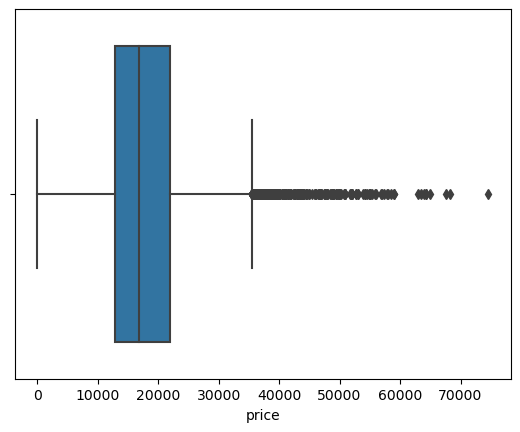

In [41]:
sns.boxplot(df.price)
plt.show()

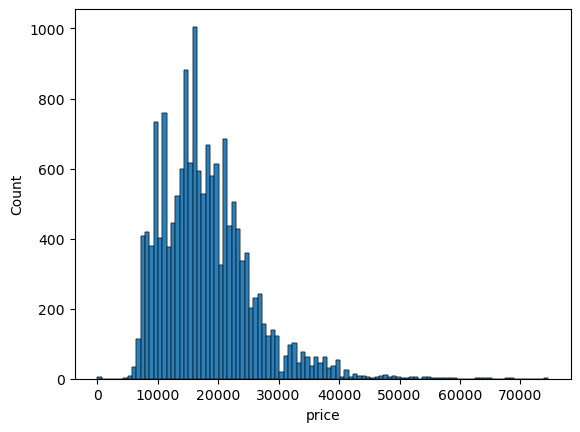

In [40]:
sns.histplot(df.price);
plt.show()

C:\Users\W-10\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


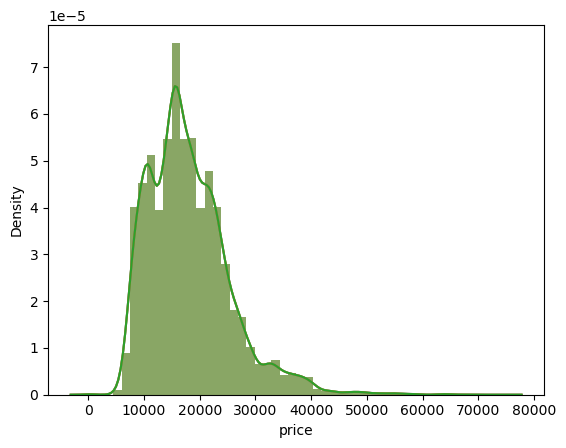

In [44]:
sns.distplot(df.price)
plt.show()

## vat

In [126]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [93]:
df["km"] = df["km"].str.replace(" km","", regex=True) # kmcolumnunda km str ifadesinden kurtuluyoruz

In [94]:
df["km"] = df["km"].replace(['-'], '0') # değeri floata çevireceğimiz için sayı harici bir ifade bulunmaması için - leri 0 a dönüştürüyoruz

In [95]:
df["km"]  = df["km"].str.replace(',', '') 

In [96]:
df["km"]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914        0
15915     9900
15916       15
15917       10
15918        0
Name: km, Length: 15919, dtype: object

In [97]:
df.km.astype('float') # type ı floata çeviriyoruz.

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        0.0
15915     9900.0
15916       15.0
15917       10.0
15918        0.0
Name: km, Length: 15919, dtype: float64

In [98]:
df.km.value_counts(dropna=False)

10       1045
0        1043
1         367
5         170
50        148
         ... 
14960       1
89214       1
10499       1
28508       1
1798        1
Name: km, Length: 6689, dtype: int64

## registration

In [99]:
df["registration"].value_counts()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
06/2018     532
04/2016     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
12/2019       1
11/2019       1
Name: registration, dtype: int64

In [100]:
df["registration"].head(20)   # bu column drop edilecek diye konuşmuştuk. First registration sütunu kullanılacak.Ama büşranın notebook undaki kodlar kullanılabilir.

0     01/2016
1     03/2017
2     02/2016
3     08/2016
4     05/2016
5     02/2016
6     03/2016
7     02/2016
8     02/2016
9     06/2017
10    05/2018
11    05/2016
12    09/2016
13    06/2016
14    10/2016
15    04/2016
16    06/2018
17    11/2017
18    07/2016
19    05/2018
Name: registration, dtype: object

## prev_owner

In [101]:
df["prev_owner"].value_counts() 

1 previous owner     8294
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [102]:
df.prev_owner.str[0].str.strip("previous owner").str.strip("previous owners").value_counts()

1    8294
2     778
3      17
4       2
Name: prev_owner, dtype: int64

## kw

In [128]:
df["kw"].value_counts()

Series([], Name: kw, dtype: int64)

In [129]:
df.drop("kw", axis=1, inplace=True)

In [132]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,previous_owners,...,description,emission_label,gears,country version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Audi A1,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",NaN,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Audi A1,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audi A1,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Audi A1,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


## hp

In [133]:
df["hp"].value_counts() 

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
75 kW        1
133 kW       1
44 kW        1
123 kW       1
163 kW       1
Name: hp, Length: 81, dtype: int64

In [134]:
df.hp.str.rstrip("kW").str.strip(" ").value_counts()

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
84        1
137       1
123       1
115       1
195       1
Name: hp, Length: 81, dtype: int64

In [135]:
df.hp= df.hp.str.rstrip("kW").str.strip(" ") # .astype(float)
df.hp

0         66
1        141
2         85
3         66
4         66
        ... 
15914    147
15915    165
15916    146
15917    147
15918    165
Name: hp, Length: 15919, dtype: object

In [136]:
df[df["hp"]== "-"] # buradaki - ler üzerinde büşranın notebookundaki çalışma benzeri yöntemle doldurulabilr.

,make_model,body_type,price,vat,km,registration,prev_owner,hp,type,previous_owners,...,description,emission_label,gears,country version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
1269,Audi A1,Compact,15500,None,"11,284 km",06/2018,None,-,"[, Used, , Diesel]",NaN,...,[\nSOMOS CONCESIONARIO OFICIAL AUDI (MOTOR GOM...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2500,Audi A1,Compact,22750,VAT deductible,10 km,-/-,None,-,"[, New, , Super 95]",NaN,...,"[\n, Highlights, Spurhalteassistent ""Lane Assi...",[\n4 (Green)\n],[\n5\n],[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN
4259,Audi A3,Compact,18700,None,"16,316 km",06/2018,None,-,"[, Used, , Diesel]",NaN,...,[\nSOMOS CONCESIONARIO OFICIAL AUDI (MOTOR GOM...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7177,Opel Astra,Sedans,18200,VAT deductible,"3,260 km",02/2019,None,-,"[, Used, , Gasoline]",NaN,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7670,Opel Astra,Compact,31246,VAT deductible,10 km,01/2019,None,-,"[, Used, , Gasoline]",NaN,...,[\nDeze gloednieuwe Opel Astra 1.4 Turbo Autom...,NaN,[\n6\n],[\nNetherlands\n],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15641,Renault Espace,Van,29300,VAT deductible,"56,585 km",11/2017,None,-,"[, Used, , Diesel]",NaN,...,[\nV dCi 160 Energy Twin Turbo Initiale Paris ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15647,Renault Espace,Van,28490,VAT deductible,"51,776 km",11/2017,None,-,"[, Used, , Diesel]",NaN,...,[\nV dCi 160 Energy Twin Turbo Initiale Paris ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15684,Renault Espace,Van,38900,VAT deductible,"3,000 km",01/2019,None,-,"[, Used, , Gasoline]",NaN,...,"[\nV Tce 225 EDC FAP Initiale Paris, essence, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15791,Renault Espace,Van,33990,VAT deductible,"10,803 km",05/2018,None,-,"[, Used, , Diesel]",NaN,...,[\nV dCi 160 Energy Twin Turbo Initiale Paris ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## type 

In [137]:
df["type"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                                       3475
[, Used, , Diesel]                                                                                                                            2516
[, Used, , Gasoline]                                                                                                                          2367
[, Used, , Super 95]                                                                                                                          1818
[, Pre-registered, , Super 95]                                                                                                                 500
                                                                                                                                              ... 
[, Used, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95 / Regular/Benzine E10 91 (

In [138]:
df["type"].str[1].value_counts(dropna=False)  # Diğer değerler Fuel sütunu ile aynı olduğu için bu şekilde alıcaz <ayşegül>

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## previous_owners 

In [139]:
df["previous_owners"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                               8101
\n2\n                                766
\n0\n                                163
\n3\n                                 17
[\n1\n, \n168 g CO2/km (comb)\n]      13
                                    ... 
[\n2\n, \n127 g CO2/km (comb)\n]       1
[\n1\n, \n159 g CO2/km (comb)\n]       1
[\n0\n, \n117 g CO2/km (comb)\n]       1
[\n0\n, \n187 g CO2/km (comb)\n]       1
[\n1\n, \n102 g CO2/km (comb)\n]       1
Name: previous_owners, Length: 102, dtype: int64

In [140]:
df["previous_owners"]= [item[0] if type(item) ==list else item for item in df["previous_owners"]]
df["previous_owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: previous_owners, Length: 15919, dtype: object

In [141]:
df.previous_owners.str[1].str.strip("\n").value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [142]:
df.previous_owners.str[1].str.strip("\n")  # Nan değerler doldurulacak

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918      1
Name: previous_owners, Length: 15919, dtype: object

## next_inspection

In [143]:
df.next_inspection.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                              12384
\n04/2022\n                                                                                         62
\n03/2021\n                                                                                         38
\n03/2022\n                                                                                         36
\n06/2021\n                                                                                         34
                                                                                                 ...  
[\n05/2020\n, \n138 g CO2/km (comb)\n]                                                               1
[\n12/2019\n, \n130 g CO2/km (comb)\n]                                                               1
[\n01/2020\n, \n111 g CO2/km (comb)\n]                                                               1
[\n01/2023\n, \n130 g CO2/km (comb)\n]                                   

In [144]:
df.next_inspection.str[0].str.strip("\n").value_counts(dropna=False).sample(10) # null değer oranı çok fazla olduğundan siliyoruz.

03/2018     2
05/2019    27
11/2021    47
09/2019    32
07/2020    35
10/2020    35
03/2020    88
02/2022    96
11/2018     4
12/2018     2
Name: next_inspection, dtype: int64

In [145]:
df.drop('next_inspection',axis=1,inplace=True)

## inspection_new

In [147]:
df.inspection_new.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 4.4 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 5 l/100 km (country), \n]          1
[\nYes\n, \n194 g CO2/km (comb)\n]                                                                 1
[\nYes\n, \n88 g CO2/km (comb)\n]                                                                  1
[\nYes\n, \n, 6 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]  

In [148]:
df.inspection_new.str[0].str.strip("\n").value_counts(dropna=False) # siliniyor

NaN    11987
Yes     3570
         362
Name: inspection_new, dtype: int64

In [149]:
df.drop("inspection_new",axis=1,inplace=True)

## warranty

In [151]:
df.warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n48 months\n, \n142 g CO2/km (comb)\n]                                                              1
\n8 months\n                                                                                          1
[\n19 months\n, \n106 g CO2/km (comb)\n]                                                              1
[\n72 months\n, \n133 g CO2/km (comb)\n]                        

In [152]:
df.warranty.str[0].str.strip("\n").value_counts(dropna=False) # silinecek

             7703
NaN          5420
12 months    1417
24 months     552
60 months     382
36 months     223
6 months       49
72 months      44
48 months      40
3 months       14
23 months      10
20 months       7
18 months       7
25 months       5
50 months       4
2 months        4
16 months       4
34 months       3
26 months       2
13 months       2
22 months       2
46 months       2
11 months       2
21 months       2
14 months       2
17 months       2
45 months       2
1 months        2
33 months       1
65 months       1
7 months        1
10 months       1
56 months       1
49 months       1
15 months       1
47 months       1
19 months       1
40 months       1
28 months       1
Name: warranty, dtype: int64

In [153]:
df.drop("warranty",axis=1,inplace=True)


## full_service

In [154]:
df.full_service.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7 l/100 km (city), \n, 4.5 l/100 km (country), \n]         1
[\n, \n, \n, 4.7 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \n164 g CO2/km (comb)\n]                                                                1
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \

In [155]:
df.full_service.str[0].str.strip("\n").value_counts(dropna=False) # silinecek

       8215
NaN    7704
Name: full_service, dtype: int64

In [156]:
df.drop("full_service",axis=1,inplace=True)

## non_smoking_vehicle

In [158]:
df.non_smoking_vehicle.value_counts(dropna=False) # silinecek

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                  8742
[\n, \n]                             3647
[\n, \n, \n4 (Green)\n]              1240
[\n, \n, \nEuro 6\n]                 1127
[\n, \n, \nEuro 6d-TEMP\n]            345
                                     ... 
[\n, \n, \n172 g CO2/km (comb)\n]       1
[\n, \n, \n150 g CO2/km (comb)\n]       1
[\n, \n, \n154 g CO2/km (comb)\n]       1
[\n, \n, \n91 g CO2/km (comb)\n]        1
[\n, \n, \n144 g CO2/km (comb)\n]       1
Name: non_smoking_vehicle, Length: 95, dtype: int64

In [159]:
df.drop("non_smoking_vehicle",axis=1,inplace=True)

## null 

In [161]:
df.null.value_counts(dropna=False) 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

In [162]:
df.drop("null",axis=1,inplace=True) 

## make

In [164]:
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [170]:
df["make"].str.strip("\n").value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

## model

In [171]:
df.model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [176]:
df.model.str[1].str.strip("\n").value_counts(dropna=False) 

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

## offer_number

In [177]:
df.drop("offer_number",axis=1,inplace=True) #index numarası gibi bir değer içerdiğinden siliyoruz

## first_registration

In [180]:
df['dm_first_reg'] = df['first_registration'] # bu aşamaya kadar böyle bir işlem yapmamıştık ama örnek olması açısından ilave ettim

In [186]:
def convert(x):   
    if x is not np.nan:
        x = str(x)
        y = re.findall("([0-9]+)", x)
        return float(y[0])

In [187]:
df.dm_first_reg = df.dm_first_reg.apply(convert)

In [188]:
df.dm_first_reg.value_counts(dropna=False)

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: dm_first_reg, dtype: int64

In [ ]:
#nan değerler çokken, registration sütununda nan değer çıkmıyor. BUnu kullanmak daha mantıklı hale geliyor. 

## km

In [189]:
df['dm_km'] = df.km.astype(str)

In [190]:
df['dm_km'] = df['dm_km'].str.extract('(\S+)\skm$')

In [191]:
df.dm_km.replace(to_replace='-', value='0', inplace=True)

In [192]:
def convert(x):
    return float(''.join(x.split(',')))

In [193]:
df.dm_km = df.dm_km.apply(convert)

In [194]:
df.dm_km.value_counts(dropna=False).sort_index()

0.0         1043
1.0          367
2.0            6
3.0           33
4.0           15
            ... 
240000.0       1
248000.0       1
260000.0       1
291800.0       1
317000.0       1
Name: dm_km, Length: 6689, dtype: int64

## registration

In [195]:
df['dm_registration'] = df.registration

In [196]:
cond = (df.dm_registration == '-/-') & (df.dm_km < 15000)
df.loc[cond, 'dm_registration'] = df.loc[cond, 'dm_registration'].map({'-/-':'01/2019'})

In [197]:
cond = (df.dm_registration == '-/-') & (df.dm_km < 40000)
df.loc[cond, 'dm_registration'] = df.loc[cond, 'dm_registration'].map({'-/-':'01/2018'})

In [198]:
cond = df.dm_registration == '-/-'
df.loc[cond, 'dm_registration'] = df.loc[cond, 'dm_registration'].map({'-/-':'01/2016'})

In [199]:
df.dm_registration.value_counts(dropna=False)  #aylardan kurtarmak lazım yıl muhabbbeti daha önemli

01/2019    2125
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
02/2018     539
03/2016     536
06/2018     532
04/2016     532
01/2018     519
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
01/2016     381
04/2017     380
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
12/2019       1
11/2019       1
Name: dm_registration, dtype: int64

In [200]:
df.dm_registration = df.dm_registration.str.split('/').str[1]

In [201]:
df.dm_registration.value_counts(dropna=False)

2018    4530
2019    4437
2016    3679
2017    3273
Name: dm_registration, dtype: int64

In [202]:
df.dm_registration = df.dm_registration.astype('float')

In [203]:
df.dm_registration = 2019 - df.dm_registration # 2019 yılında olduğumuzu varsayarak araç yaşını hesaplıyoruz

In [204]:
df.dm_registration = 2019 - df.dm_registration

In [205]:
df.dm_registration.value_counts(dropna=False)

2018.0    4530
2019.0    4437
2016.0    3679
2017.0    3273
Name: dm_registration, dtype: int64

## body_color

In [206]:
df['dm_body_color'] = df['body_color']

In [207]:
def convert(x) :
    if x is not np.nan:
        x=str(x)
        y=re.findall("'([a-zA-Z]+)'",x)
        return y[0]

In [209]:
df.dm_body_color = df.dm_body_color.apply(convert)

In [210]:
lst1 = df.dm_registration.unique()
lst2 = ['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Espace']
for i in lst1:
    for j in lst2:
        cond = (df.make_model == j) & (df.dm_registration == i)
        df.loc[cond, 'dm_body_color'] = df.loc[cond, 'dm_body_color'].fillna(df.loc[cond, 'dm_body_color'].mode()[0])

In [211]:
df.dm_body_color.value_counts(dropna=False)

Black     4134
Grey      3588
White     3508
Silver    1650
Blue      1451
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: dm_body_color, dtype: int64

In [ ]:
#df_dummied = pd.get_dummies(df.dm_body_color, prefix='color_', prefix_sep='', columns=['color'], dtype='float64')   #dummy
#df = pd.concat([df, df_dummied], axis=1)

## paint_type

In [212]:
df['dm_paint_type'] = df['paint_type']

In [213]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z]+)\S+', x)
        return y[0]

In [214]:
df.dm_paint_type = df.dm_paint_type.apply(convert)

In [215]:
df.dm_paint_type.value_counts(dropna=False)

Metallic    9794
NaN         5772
Uni          347
Per            6
Name: dm_paint_type, dtype: int64

In [216]:
lst1 = df.dm_body_color.unique()
lst2 = df.make_model.unique()
for i in lst1:
    for j in lst2:
        cond = (df.make_model == j) & (df.dm_registration == i)
        df.loc[cond, 'dm_paint_type'] = df.loc[cond, 'dm_paint_type'].fillna(method='ffill').fillna(method='bfill')
df.dm_paint_type = df.dm_paint_type.fillna(method='ffill').fillna('bfill')

In [217]:
df.dm_paint_type.value_counts(dropna=False) 

Metallic    15261
Uni           617
Per            41
Name: dm_paint_type, dtype: int64

## body_color 

In [218]:
df.drop("body_color",axis=1,inplace=True) # işe yaramayacak bir sütun drop edilmiş

## upholstery

In [219]:
df['dm_upholstery'] = df.upholstery

In [220]:
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('n([A-Za-z\s]+)', x)
        return y[0]

In [221]:
df.dm_upholstery = df.dm_upholstery.apply(convert)

In [222]:
df.dm_upholstery.value_counts(dropna=False)

Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
Blue               2
White              2
Name: dm_upholstery, dtype: int64

In [223]:
df.dm_upholstery.replace(to_replace=['Black','Grey','Brown','Beige','Blue','White'], value=np.nan, inplace=True)

In [224]:
df.dm_upholstery.value_counts(dropna=False)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: dm_upholstery, dtype: int64

In [225]:
lst = df.make_model.unique()
for i in lst:
    cond = (df.make_model == i) 
    df.loc[cond, 'dm_upholstery'] = df.loc[cond, 'dm_upholstery'].fillna(method='ffill').fillna(method='bfill')

In [226]:
df.dm_upholstery.value_counts(dropna=False) 

Cloth           11713
Part leather     2097
Full leather     1401
Other             544
alcantara          84
Velour             80
Name: dm_upholstery, dtype: int64

In [ ]:
# burada büşranın yaptığı columnların isimleri değiştiği için orijinalleri için birer drop satırı yazıyorum sormadan çalıştırmak istemedim.

In [ ]:
#df.drop("upholstery",axis=1,inplace=True)

In [ ]:
#df.drop("paint_type",axis=1,inplace=True)

In [ ]:
#df.drop("body_color",axis=1,inplace=True)

In [ ]:
#df.drop("km",axis=1,inplace=True)

In [ ]:
#df.drop("first_registration",axis=1,inplace=True)

## body

In [227]:
df.body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [228]:
df.body.str[1].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

## body_type

In [229]:
df.body_type.value_counts(dropna=False) # body ve body_type sütunları aynı değerleri içerdiğinden birini siliyoruz

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [231]:
df.drop("body_type",axis=1,inplace=True) 

## nr_of_doors 

In [232]:
df.nr_of_doors.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: nr_of_doors, dtype: int64

In [234]:
df["nr_of_doors"].str[0].str.strip("\n").value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
7          1
1          1
Name: nr_of_doors, dtype: int64

## nr_of_seats

In [235]:
df.nr_of_seats.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [236]:
df.nr_of_seats.str[0].str.strip("\n").value_counts(dropna=False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

## model_code

In [237]:
df.model_code.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/BHX\n]        1
[\n0588/AVR\n]        1
[\n0035/ASN\n]        1
[\n1844/AEG\n]        1
[\n3333/BBL\n]        1
Name: model_code, Length: 233, dtype: int64

In [240]:
df.model_code.str[0].str.strip("\n").value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/BAN        1
0035/BAA        1
0035/AEV        1
1844/999        1
0588/BN0        1
Name: model_code, Length: 233, dtype: int64

## gearing_type

In [241]:
df.gearing_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [247]:
df.gearing_type.str[1].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

In [ ]:
## displacement

In [248]:
df.displacement.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n1,800 cc\n]       1
[\n1,686 cc\n]       1
[\n1,369 cc\n]       1
[\n140 cc\n]         1
[\n1,584 cc\n]       1
Name: displacement, Length: 78, dtype: int64

In [250]:
df.displacement.str[0].str.strip("\n").str.strip("cc").str.replace(',','').value_counts()

1598      4761
999       2438
1398      1314
1399       749
1229       677
          ... 
1350         1
1368         1
1533         1
140          1
16000        1
Name: displacement, Length: 77, dtype: int64

## cylinders 

In [251]:
df.cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [252]:
df.cylinders.str[0].str.strip("\n").value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

## comfort_convenience

In [253]:
df["comfort_convenience"].value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [254]:
df["comfort_convenience"] = [",".join(item) if type(item) == list else item for item in df["comfort_convenience"]]

In [255]:
df["comfort_convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

In [ ]:
# bu sütunun nasıl kullanılacağına dair görüşmeliyiz. derste bazı arkadaşlar saydırırız gibi fikirler üretmişlerdi.

## weight 

In [256]:
df["weight"].value_counts(dropna=False) 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,761 kg\n]       1
[\n1,331 kg\n]       1
[\n1,974 kg\n]       1
[\n1,711 kg\n]       1
[\n1,686 kg\n]       1
Name: weight, Length: 435, dtype: int64

In [257]:
df["weight_kg"] = df.weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

In [258]:
df["weight_kg"].value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1161.0       1
1254.0       1
1379.0       1
1575.0       1
1159.0       1
Name: weight_kg, Length: 435, dtype: int64

In [259]:
df.drop("weight", axis=1, inplace=True)

## drive_chain 

In [260]:
df["drive_chain"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [261]:
df['drive_chain'] = df['drive_chain'].str[0].str.strip('\n')

In [262]:
df["drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

## fuel

In [263]:
df["fuel"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Super 95 / Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95, \n]       1
[\n, Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98, \n]       1
[\n, Reg

In [264]:
df["fuel"] = df.fuel.str[1].str.split("/").str[0].str.strip()

In [265]:
df["fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Others                                  5
Electric                                5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: fuel, dtype: int64

In [266]:
df["fuel"] = df.fuel.str.split("(").str[0].str.strip()

In [267]:
df["fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: fuel, dtype: int64

In [268]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["fuel"] = df.fuel.apply(fueltype)

In [269]:
df.fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

## consumption

In [270]:
df["consumption"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.1 l/100 km (comb)], [], [3.5 l/100 km (country)]]                                    1
[[5.2 l/100 km (comb)], [6 l/100 km (city)], [4.8 l/100 km (country)]]                   1
[[5.3 l/100 km (comb)], [6 l/100 km (city)], [5 l/100 km (country)]]                     1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]       1
[[50 l/100 km (comb)], [64 l/100 km (city)], [42 l/100 km (country)]]                    1

In [271]:
df['consumption'].sample(55) # datayi anlamak icin rastgele 55 sample aldim.

3296     [[3.8 l/100 km (comb)], [4.5 l/100 km (city)],...
10166    [[5.7 l/100 km (comb)], [7.3 l/100 km (city)],...
2908     [[4.1 l/100 km (comb)], [5 l/100 km (city)], [...
4609     [[3.9 l/100 km (comb)], [4.2 l/100 km (city)],...
3300     [[5 l/100 km (comb)], [6.3 l/100 km (city)], [...
895      [[3.7 l/100 km (comb)], [4.2 l/100 km (city)],...
1207     [[3.7 l/100 km (comb)], [4.3 l/100 km (city)],...
9575     [[5.3 l/100 km (comb)], [6.9 l/100 km (city)],...
1732     [[3.9 l/100 km (comb)], [4.5 l/100 km (city)],...
8872     [[3.1 l/100 km (comb)], [3.4 l/100 km (city)],...
15613    [[6.2 l/100 km (comb)], [7.8 l/100 km (city)],...
6752     [[4.3 l/100 km (comb)], [5.2 l/100 km (city)],...
8013     [\n, 5 l/100 km (comb), \n, 5.9 l/100 km (city...
14421    [[5.9 l/100 km (comb)], [7.6 l/100 km (city)],...
1687     [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
10157    [[6.9 l/100 km (comb)], [8.7 l/100 km (city)],...
2921     [[5 l/100 km (comb)], [6.1 l/100 km (city)], [.

There are three tpyes of value which can effect the result.
Type 1-one list and three sub list (comb,city,country), like= [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
Type 2-one list and no sub list (comb,city,country), like = [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]
Type 3-one list and three sub lists some of which are empty, like = [[], [4.6 l/100 km (city)], [5.7 l/100 km (country)]] or [[4.2 l/100 km (comb)], [], []] or [[], [], [5.1 l/100 km (country)]]
So, we use str.extract() to select numeric consumption(comb) in different ways below.

In [272]:
df.consumption.str[0]  # bu sekilde ilk elemana yani genellikle yakit tüketimi comb seklinde gösterilenlere

0        [3.8 l/100 km (comb)]
1        [5.6 l/100 km (comb)]
2        [3.8 l/100 km (comb)]
3        [3.8 l/100 km (comb)]
4        [4.1 l/100 km (comb)]
                 ...          
15914    [5.3 l/100 km (comb)]
15915                       \n
15916    [5.3 l/100 km (comb)]
15917    [5.3 l/100 km (comb)]
15918    [6.8 l/100 km (comb)]
Name: consumption, Length: 15919, dtype: object

In [273]:
df.consumption.str[0].value_counts(dropna = False).sample(10) #value_counts yapip sample aldim

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[3.6 kg/100 km (comb)]      1
[4.2 l/100 km (comb)]     408
[43 l/100 km (comb)]        1
[3.3 kg/100 km (comb)]      9
[5.8 l/100 km (comb)]     142
[3.9 l/100 km (comb)]     732
[]                        127
[5.1 kg/100 km (comb)]      3
[6.6 l/100 km (comb)]     119
[9.1 l/100 km (comb)]       1
Name: consumption, dtype: int64

In [274]:
df.consumption.str[0].value_counts(dropna = False).sample(10) #bir 10 sample daha aldim, 

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[3.4 kg/100 km (comb)]     12
[5.7 l/100 km (comb)]     302
[6.6 l/100 km (comb)]     119
[3.3 kg/100 km (comb)]      9
[5.5 l/100 km (comb)]     342
[8.3 l/100 km (comb)]      19
[5.8 l/100 km (comb)]     142
[4.9 l/100 km (comb)]     348
[9.1 l/100 km (comb)]       1
[5.4 l/100 km (comb)]     662
Name: consumption, dtype: int64

In [275]:
df.consumption.str[0].value_counts(dropna = False).sample(10) # 10 sample daha aldim

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[4.7 l/100 km (comb)]    555
[3 l/100 km (comb)]       69
[8.6 l/100 km (comb)]      3
[6.8 l/100 km (comb)]    134
[7.5 l/100 km (comb)]      1
[5.6 l/100 km (comb)]    568
[0 l/100 km (comb)]        2
[40 l/100 km (comb)]       2
[3.7 l/100 km (comb)]    369
[3.5 l/100 km (comb)]    285
Name: consumption, dtype: int64

There are 850 values in which only 'one' list (the value of "\n" indicates that). Consists of no sub list.

There are 127 values is '[]' which means there is no comb consumption. Only have city or country or both.

There are still 1906 NaNs.

In [276]:
df.consumption.str[0].str[0].value_counts(dropna = False) #bu sekilde 127 bos listenin de icine girerek onlari da NaN olarak saydirdim

NaN                     2033
\n                       850
3.9 l/100 km (comb)      732
4 l/100 km (comb)        712
5.4 l/100 km (comb)      662
                        ... 
13.8 l/100 km (comb)       1
54 l/100 km (comb)         1
32 l/100 km (comb)         1
3.6 kg/100 km (comb)       1
5.4 kg/100 km (comb)       1
Name: consumption, Length: 81, dtype: int64

In [277]:
df.consumption.str[0].str[0].unique() # unique degerlere baktim

array(['3.8 l/100 km (comb)', '5.6 l/100 km (comb)',
       '4.1 l/100 km (comb)', '3.5 l/100 km (comb)',
       '3.7 l/100 km (comb)', nan, '4 l/100 km (comb)',
       '4.9 l/100 km (comb)', '4.2 l/100 km (comb)',
       '4.5 l/100 km (comb)', '4.4 l/100 km (comb)',
       '4.3 l/100 km (comb)', '3 l/100 km (comb)', '3.6 l/100 km (comb)',
       '3.4 l/100 km (comb)', '\n', '3.9 l/100 km (comb)',
       '5.1 l/100 km (comb)', '5.2 l/100 km (comb)',
       '4.6 l/100 km (comb)', '4.8 l/100 km (comb)',
       '5.8 l/100 km (comb)', '4.7 l/100 km (comb)', '5 l/100 km (comb)',
       '43 l/100 km (comb)', '13.8 l/100 km (comb)', '6 l/100 km (comb)',
       '5.9 l/100 km (comb)', '51 l/100 km (comb)', '5.3 l/100 km (comb)',
       '5.3 kg/100 km (comb)', '5.5 l/100 km (comb)',
       '3.4 kg/100 km (comb)', '10 l/100 km (comb)',
       '3.3 kg/100 km (comb)', '3.2 l/100 km (comb)',
       '3.5 kg/100 km (comb)', '6.6 l/100 km (comb)',
       '3.3 l/100 km (comb)', '8.3 l/100 km (comb)',
  

In [278]:
df["consumption_comb"] =df.consumption.str[0].str[0].str.extract("(\d.\d|\d)") # extract ettigim veriyi consumption_comb diye yeni sütuna atadim

In [279]:
df.consumption_comb.value_counts(dropna = False) # degerleri saydirdim

NaN    2883
3.9     732
4       716
5.4     663
5.1     630
4.4     595
3.8     585
5.6     568
4.7     555
4.8     523
5       520
4.5     511
5.2     429
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
3.3     307
5.7     302
4.3     295
3.5     288
6       278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3        73
6.4      64
7.4      62
7.1      38
1        37
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7         9
3.1       7
7.8       6
7.2       6
8         5
8.6       3
8.7       3
0         2
7.9       2
7.3       2
8.1       2
9.1       1
1.2       1
7.5       1
Name: consumption_comb, dtype: int64

In [280]:
df.consumption.str[1].value_counts(dropna = False) #simdi diger elemana geciyorum, city tüketimine

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                        1906
[5 l/100 km (city)]         642
[5.8 l/100 km (city)]       597
[4.5 l/100 km (city)]       577
[]                          516
                           ... 
8.6 l/100 km (comb)           1
[10.5 kg/100 km (city)]       1
[4.4 kg/100 km (city)]        1
[9 l/100 km (city)]           1
[6.5 kg/100 km (city)]        1
Name: consumption, Length: 130, dtype: int64

In [281]:
df.consumption.str[1].value_counts(dropna = False).sample(10) # 10 adet sample aldim

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[66 l/100 km (city)]        1
[7.6 l/100 km (city)]     227
[5.5 l/100 km (city)]     207
[16.1 l/100 km (city)]      1
4.7 l/100 km (comb)        47
[4.4 kg/100 km (city)]      1
[9 l/100 km (city)]         1
[10.1 l/100 km (city)]      2
5.9 l/100 km (comb)        61
4.5 l/100 km (comb)        12
Name: consumption, dtype: int64

In [282]:
consumption1 = df.consumption.str[1].str.extract("(\d.\d|\d)") # patern girip extract ettirdim ve bunun consumption1'e atadim

In [283]:
consumption1.head() #head'ine baktim. hep NaN

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [284]:
consumption1[0].value_counts(dropna = False) #degerleri saydirdim baktim ki cok NaN var.

NaN    15069
5.4      107
5.9       61
6         53
5.6       50
4.7       47
4.9       45
6.1       40
5.7       40
6.3       40
5.5       38
5         32
6.2       32
6.6       29
4.4       28
5.1       27
4.2       27
5.2       25
4.8       23
5.8       22
4.5       12
4.3       12
6.4       11
6.7       10
6.5        7
4.6        6
6.9        6
5.3        5
7.4        4
1.6        3
6.8        2
4          1
8.6        1
7          1
7.9        1
4.1        1
3.9        1
Name: 0, dtype: int64

In [285]:
consumption1[0].value_counts().sum() #kac farkli deger olduguna baktim

850

In [286]:
df.consumption_comb.fillna(consumption1[0]).value_counts(dropna = False) #consumption_comb'daki NaN verileri consumption1'den doldursam ne olur diye baktim

NaN    2033
5.4     770
3.9     733
4       717
5.1     657
4.4     623
5.6     618
4.7     602
3.8     585
5       552
4.8     546
4.5     523
5.2     454
4.2     435
4.6     426
4.9     393
5.3     380
5.5     380
3.7     369
5.9     369
5.7     342
4.1     342
6       331
3.3     307
4.3     307
3.5     288
6.2     216
3.6     194
6.3     181
6.1     175
5.8     164
6.6     148
6.8     136
3.4     106
6.4      75
3        73
7.4      66
6.7      43
6.5      43
7.1      38
1        37
6.9      27
3.2      25
8.3      20
7.6      14
7        10
3.1       7
7.2       6
7.8       6
8         5
8.6       4
7.9       3
8.7       3
1.6       3
0         2
7.3       2
8.1       2
9.1       1
1.2       1
7.5       1
Name: consumption_comb, dtype: int64

In [287]:
df.consumption_comb.fillna(consumption1[0], inplace = True) # doldurdum

In [288]:
df.consumption_comb.isnull().sum()*100/df.consumption_comb.shape[0] # ne kadari hala NaN ona baktim

12.770902694892895

In [289]:
df["consumption"].str[-2].value_counts(dropna = False) #simdi diger elamana gectim ama farkli sekilde ulastim bu sefer -2 ile tersten geldim

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                       1906
[5 l/100 km (city)]        642
[5.8 l/100 km (city)]      597
[4.5 l/100 km (city)]      577
[]                         516
                          ... 
[10.4 l/100 km (city)]       1
[64 l/100 km (city)]         1
[6.5 kg/100 km (city)]       1
[9 l/100 km (city)]          1
3.3 l/100 km (country)       1
Name: consumption, Length: 121, dtype: int64

In [290]:
df["consumption"].str[-2].str[0].str.extract("(\d.\d|\d)")[0].value_counts(dropna = False) #patern girip degerleri saydirdim

NaN    2436
5       858
4       836
5.8     600
4.5     580
       ... 
8.8       2
3.6       2
9.5       2
9.7       1
9         1
Name: 0, Length: 70, dtype: int64

In [291]:
consumption_city = df["consumption"].str[-2].str[0].str.extract("(\d.\d|\d)") #bunu consumption_city'e atadim

In [292]:
consumption_city = pd.to_numeric(consumption_city[0]) #numerik'e dönüstürdüm, baska bir yolla

In [293]:
consumption_city

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    6.0
15916    6.2
15917    6.2
15918    8.7
Name: 0, Length: 15919, dtype: float64

In [294]:
df["consumption"].str[-1].str[0].unique() #diger elamana ulastim, country'e

array(['3.5 l/100 km (country)', '4.7 l/100 km (country)',
       '3.4 l/100 km (country)', '3.8 l/100 km (country)',
       '3.1 l/100 km (country)', nan, '3.6 l/100 km (country)',
       '4.2 l/100 km (country)', '3.7 l/100 km (country)',
       '3.9 l/100 km (country)', '3.3 l/100 km (country)',
       '3 l/100 km (country)', '\n', '4.4 l/100 km (country)',
       '4 l/100 km (country)', '4.3 l/100 km (country)',
       '4.9 l/100 km (country)', '4.1 l/100 km (country)',
       '4.5 l/100 km (country)', '3.2 l/100 km (country)',
       '10.3 l/100 km (country)', '5.1 l/100 km (country)',
       '6.7 l/100 km (country)', '6.3 l/100 km (country)',
       '4.8 l/100 km (country)', '44 l/100 km (country)',
       '5.4 l/100 km (country)', '4.6 l/100 km (country)',
       '4.6 kg/100 km (country)', '2.9 kg/100 km (country)',
       '2.8 kg/100 km (country)', '5.6 l/100 km (country)',
       '6.6 l/100 km (country)', '6 l/100 km (country)',
       '6.5 l/100 km (country)', '4.5 kg/100 km 

In [295]:
df['consumption'].str[-1].str[0].value_counts(dropna = False) #deegrleri saydirdim

NaN                        2362
4.2 l/100 km (country)     1101
3.7 l/100 km (country)     1059
\n                          850
4.4 l/100 km (country)      829
                           ... 
6.9 l/100 km (country)        1
7.6 l/100 km (country)        1
3 kg/100 km (country)         1
2 l/100 km (country)          1
4.5 kg/100 km (country)       1
Name: consumption, Length: 65, dtype: int64

In [296]:
df['consumption'].str[-1].str[0].str.extract('(\d.\d|\d)')[0].value_counts(dropna = False) #patern girip baktim

NaN    3212
4.2    1101
3.7    1059
4.4     829
4.5     789
3.8     775
3.9     759
4.1     569
4.7     562
4       560
3.5     525
4.3     496
3.6     486
3.1     481
3.3     456
4.6     446
4.9     410
3.4     353
4.8     289
5.3     227
5.1     215
5.7     191
5.4     190
3.2     180
3       146
5.6     131
5       106
5.2      84
6.3      49
6        35
1        34
5.8      30
5.5      30
7.7      20
6.6      19
2.9      16
6.4      15
0         9
2.8       9
7.3       4
6.5       4
7.1       3
7.8       2
6.9       2
7         2
6.7       2
5.9       2
8.6       1
2         1
7.6       1
6.1       1
8         1
Name: 0, dtype: int64

In [297]:
consumption_country = df['consumption'].str[-1].str[0].str.extract('(\d.\d|\d)') # bunu consumption_country'e atadim

In [298]:
consumption_country = pd.to_numeric(consumption_country[0]) #numerik'e dönüstürdüm

In [299]:
consumption_country

0        3.5
1        4.7
2        3.4
3        3.5
4        3.8
        ... 
15914    4.7
15915    NaN
15916    4.7
15917    4.7
15918    5.7
Name: 0, Length: 15919, dtype: float64

In [300]:
consumption2 = (consumption_city + consumption_country) / 2 #consumption2'yi city ve country'nin ortalamasi olarak hesapladim

In [301]:
consumption2.value_counts(dropna = False) #degerleri saydirdim

NaN     3283
3.90     610
5.65     498
4.75     497
4.10     439
        ... 
7.85       1
7.25       1
7.70       1
1.50       1
3.35       1
Name: 0, Length: 139, dtype: int64

In [302]:
df.consumption_comb.fillna(consumption2).value_counts(dropna = False) #consumption_comb'daki NaN verileri, consumption2 ile doldursam ne olur diye baktim

NaN     1925
5.4      770
3.9      733
4        717
5.1      657
        ... 
9.1        1
1.2        1
7.5        1
4.5        1
4.55       1
Name: consumption_comb, Length: 70, dtype: int64

In [303]:
df.consumption_comb.fillna(consumption2, inplace = True) #doldurdum

## co2_emission

In [304]:
df["co2_emission"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             1808
[\n120 g CO2/km (comb)\n]        740
[[], [], []]                     628
[\n99 g CO2/km (comb)\n]         545
[\n97 g CO2/km (comb)\n]         537
                                ... 
[\n990 g CO2/km (comb)\n]          1
[\n51 g CO2/km (comb)\n]           1
[\n14,457 g CO2/km (comb)\n]       1
[\n193 g CO2/km (comb)\n]          1
[\n253 g CO2/km (comb)\n]          1
Name: co2_emission, Length: 124, dtype: int64

In [305]:
df["co2_emission"].str[0].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                           1808
\n120 g CO2/km (comb)\n        740
[]                             628
\n99 g CO2/km (comb)\n         545
\n97 g CO2/km (comb)\n         537
                              ... 
\n165 g CO2/km (comb)\n          1
\n253 g CO2/km (comb)\n          1
\n13,983 g CO2/km (comb)\n       1
\n181 g CO2/km (comb)\n          1
\n184 g CO2/km (comb)\n          1
Name: co2_emission, Length: 124, dtype: int64

In [306]:
df['co2_emission'].str[0].str.strip('\n').value_counts(dropna = False).sample(5)

87 g CO2/km (comb)          6
193 g CO2/km (comb)         1
239 g CO2/km (comb)         1
95 g CO2/km (comb)        161
13,983 g CO2/km (comb)      1
Name: co2_emission, dtype: int64

In [307]:
df["co2_emission"].str[0].str.strip("\n").str.replace(",", "").value_counts(dropna = False).sample(5)

118 g CO2/km (comb)     270
170 g CO2/km (comb)      10
100 g CO2/km (comb)      36
NaN                    2436
123 g CO2/km (comb)     178
Name: co2_emission, dtype: int64

In [308]:
pattern = "(\d\d\d\d\d|\d\d\d\d|\d\d\d|\d\d|\d)"
df["co2_emission"]= df['co2_emission'].str[0].str.strip('\n').str.replace(",", "").str.extract(pattern)[0]

In [309]:
df["co2_emission"].value_counts(dropna = False)

NaN    2436
120     740
99      545
97      537
104     501
       ... 
177       1
80        1
184       1
45        1
180       1
Name: co2_emission, Length: 123, dtype: int64

## emission_class

In [310]:
df["emission_class"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [311]:
df['emission_class'].str[0].str.strip('\n').value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [312]:
df['emission_class'] = df['emission_class'].str[0].str.strip('\n')

In [313]:
df.replace({"emission_class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [314]:
df.emission_class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

## comfort_convenience

## entertainment_media

## extras

## safety_security

## description

## emission_label

In [315]:
df["emission_label"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [316]:
df['emission_label'].str[0].str.strip('\n').value_counts(dropna=False) 

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [317]:
df.drop("emission_label", axis=1, inplace=True) # çok nan değer içerdiğinden drop ediyoruz

## gears

In [318]:
df["gears"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: gears, dtype: int64

In [319]:
df["gears"] = df.gears.str[0].str.strip('\n')

In [320]:
df["gears"].value_counts(dropna=False) # 50'YE  5 YAZ , NANLARA OTOMATİK OLARAK DEĞERLENDİR 0 OLARAK KODLA . ONUN ÜZERİNDEN ANALİZİ YAP.

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
3         2
4         2
1         2
50        1
2         1
Name: gears, dtype: int64

In [321]:
df[df["gears"] == "50"]

,make_model,price,vat,km,registration,prev_owner,hp,type,previous_owners,make,...,last_timing_belt_service_date,available_from,dm_first_reg,dm_km,dm_registration,dm_body_color,dm_paint_type,dm_upholstery,weight_kg,consumption_comb
14495,Renault Clio,10798,VAT deductible,10 km,01/2019,1 previous owner,56,"[, Pre-registered, , Super 95]",\n1\n,\nRenault\n,...,NaN,NaN,2019.0,10.0,2019.0,Black,Metallic,Cloth,1165.0,5.2


In [322]:
df.gears.iloc[14495] = "5"

C:\Users\W-10\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [323]:
df.gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3240
7      1908
8       224
9         6
3         2
4         2
1         2
2         1
Name: gears, dtype: int64

In [ ]:
## country version 

In [327]:
df["country version"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nEgypt\n]                1
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
Name: country version, dtype: int64

In [325]:
df['country version'].str[0].str.strip('\n').value_counts(dropna=False) 

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Bulgaria             2
Romania              2
Switzerland          1
Slovenia             1
Serbia               1
Luxembourg           1
Egypt                1
Name: country version, dtype: int64

In [328]:
#df.drop("country version", axis=1, inplace=True)

## electricity_consumption 

## last_service_date

## other_fuel_type

## availability

## last_timing_belt_service_date

## available_from 

## Import Libraries and Data

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)